In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import precision_score, recall_score

In [161]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [163]:
df.shape

(284807, 31)

In [164]:
df.drop('Time', axis= 1, inplace = True)

<h2>Correlations

<Axes: >

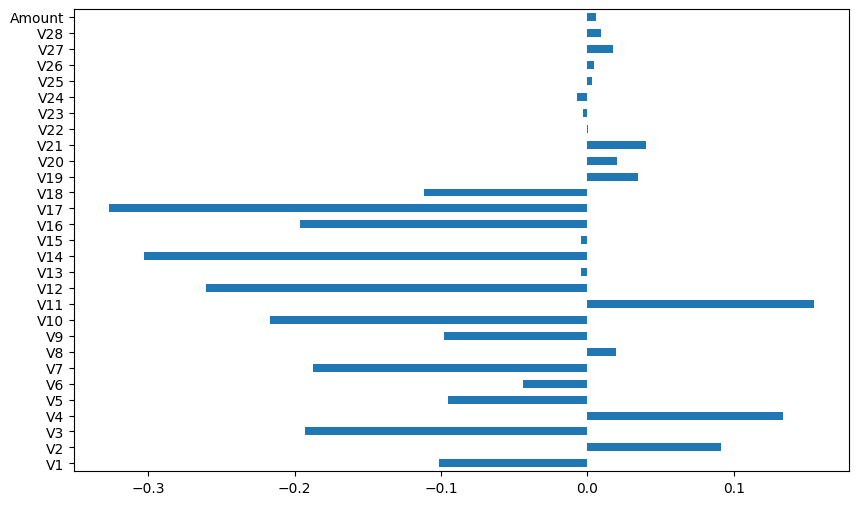

In [165]:
cor = df.corr()['Class'].drop('Class')
cor.plot(kind = 'barh', figsize= (10,6))

<h2>Scaling

In [166]:
scaler = StandardScaler()
data = scaler.fit_transform(df.iloc[:,:29])

In [167]:
data.shape

(284807, 29)

<h2>Splitting

In [168]:
X = data
y = df.Class

In [169]:
# Normalize X
X = normalize(X, 'l1')

In [170]:
print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 40, test_size= 0.3)

<h2>modeling

In [172]:
sam_w = compute_sample_weight('balanced', y_train)

<h3>Decision Tree

In [173]:
dtree = DecisionTreeClassifier(max_depth= 4, random_state= 40)
dtree.fit(X_train, y_train, sample_weight= sam_w) 

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,40
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [174]:
dt_pred = dtree.predict_proba(X_test)[:,1]        # As the output : [normal, Fraud] probabilities, i need (Fraud) probabilities

In [175]:
print(f'The AUC-ROC-Acc For Decision Tree : {round(roc_auc_score(y_test, dt_pred), 3)}')

The AUC-ROC-Acc For Decision Tree : 0.937


<h4>Feature Selection For Decision Tree

Based on the Correlation betweeen i will consider the most effective features to train the model on

In [176]:
cor = df.corr()['Class'].drop('Class').sort_values(ascending= False)
cor

V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [177]:
cols_to_drop = ['V28', 'Amount', 'V26', 'V25', 'V22', 'V23', 'V15', 'V13', 'V24']
data = df.drop(columns= cols_to_drop, axis = 1)
selec_f = data.values

In [178]:
selec_f = scaler.fit_transform(selec_f[:,:20])

In [179]:
X = selec_f
y = data.Class
X = normalize(X, 'l1')

In [180]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, random_state= 4, test_size= 0.3)
Weight_sample = compute_sample_weight('balanced', y_train_s)

In [181]:
dtree = DecisionTreeClassifier(max_depth= 4, random_state= 40)
dtree.fit(X_train_s, y_train_s, sample_weight= Weight_sample) 

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,40
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [182]:
dt_preds = dtree.predict_proba(X_test_s)[:,1]
print(f'The AUC-ROC-Acc For Decision Tree : {round(roc_auc_score(y_test_s, dt_preds), 3)}')

The AUC-ROC-Acc For Decision Tree : 0.97


In [183]:
dt_hat = dtree.predict(X_test_s)
recall = recall_score(y_test_s, dt_hat)
precision = precision_score(y_test_s, dt_hat)

print(f'Recall Score For DT_sele : {recall}')
print(f'Precision Score For DT_sele : {precision}')

Recall Score For DT_sele : 0.8972602739726028
Precision Score For DT_sele : 0.03386763185108583


<h3>Support Vector Classifier

In [184]:
svc = LinearSVC(class_weight= 'balanced', random_state = 40, loss= 'hinge', fit_intercept= False, max_iter= 3000)

svc.fit(X_train, y_train)

,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,False
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,40


In [185]:
svc_pred = svc.decision_function(X_test)

In [186]:
print(f'The AUC-ROC-Acc For SVC : {round(roc_auc_score(y_test, svc_pred), 3)}')

The AUC-ROC-Acc For SVC : 0.968


In [189]:
svc_hat = svc.predict(X_test)
recall = recall_score(y_test, svc_hat)
precision = precision_score(y_test, svc_hat)

print(f'Recall Score For SVC : {recall}')
print(f'Precision Score For SVC : {precision}')

Recall Score For SVC : 0.9637681159420289
Precision Score For SVC : 0.00926441905823349


In [190]:
from sklearn.metrics import average_precision_score

print("PR-AUC:", average_precision_score(y_test, svc_pred))


PR-AUC: 0.7321584753997102


In [192]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc_pred)

idx = np.where(precision >= 0.2)[0][0]   
best_threshold = thresholds[idx]


In [193]:
final_preds = (svc_pred >= best_threshold).astype(int)

print("Recall:", recall_score(y_test, final_preds))
print("Precision:", precision_score(y_test, final_preds))


Recall: 0.8260869565217391
Precision: 0.2
